## **Importing Basic Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
plt.style.use('ggplot')

# **Drawing Insights From Data**

In [3]:
data= pd.read_csv('/content/Product Reviews.csv')
data.head()

,User Id,Product Id,Rating(out of 5),Review Paragraph,Scrape Timestamp,Source
0,206819,69174,1,"I've used it for over a month, and I love it. ...",20-01-2025 14:13,Yelp
1,464924,86973,5,"I got this as a gift, and it's satisfied. It d...",20-01-2025 13:49,AliExpress
2,974753,82929,3,"used it for over a month, and I regret buying ...",20-01-2025 13:43,AliExpress
3,461644,35853,5,"This is my second purchase from Yelp, and as u...",20-01-2025 13:32,AliExpress
4,742399,36090,5,"Bought this from AliExpress, and I must say I'...",20-01-2025 14:26,AliExpress


In [4]:
data.shape

(5403, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User Id           5403 non-null   int64 
 1   Product Id        5403 non-null   int64 
 2   Rating(out of 5)  5403 non-null   int64 
 3   Review Paragraph  5403 non-null   object
 4   Scrape Timestamp  5403 non-null   object
 5   Source            5403 non-null   object
dtypes: int64(3), object(3)
memory usage: 253.4+ KB


In [6]:
review_count = data["Rating(out of 5)"].value_counts()
review_count

,count
Rating(out of 5),
5,3384
4,763
1,523
3,420
2,313


# **Data Cleaning**

In [7]:
print(data.isnull().sum)

<bound method DataFrame.sum of       User Id  Product Id  Rating(out of 5)  Review Paragraph  \
0       False       False             False             False   
1       False       False             False             False   
2       False       False             False             False   
3       False       False             False             False   
4       False       False             False             False   
...       ...         ...               ...               ...   
5398    False       False             False             False   
5399    False       False             False             False   
5400    False       False             False             False   
5401    False       False             False             False   
5402    False       False             False             False   

      Scrape Timestamp  Source  
0                False   False  
1                False   False  
2                False   False  
3                False   False  
4                False 

In [8]:
data.duplicated().sum()

0

In [9]:
dataf = data[data["Scrape Timestamp"] != "Invalid Date"]
data["Scrape Timestamp"] = pd.to_datetime(data["Scrape Timestamp"], format="%d-%m-%Y %H:%M", errors="coerce")
data.dropna(subset=["Scrape Timestamp"], inplace=True)

data["Date"] = data["Scrape Timestamp"].dt.date


# **Visualization**

<ipython-input-10-188626655f58>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Rating(out of 5)"], palette="viridis")


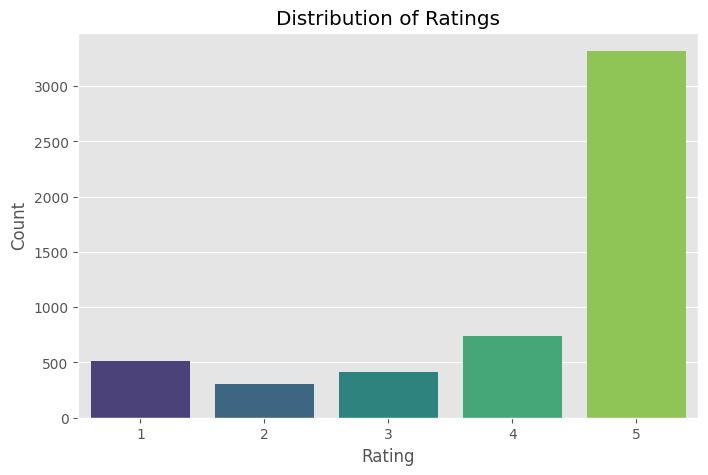

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data["Rating(out of 5)"], palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

<ipython-input-11-476870071190>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["Source"].value_counts().index, x=data["Source"].value_counts(), palette="mako")


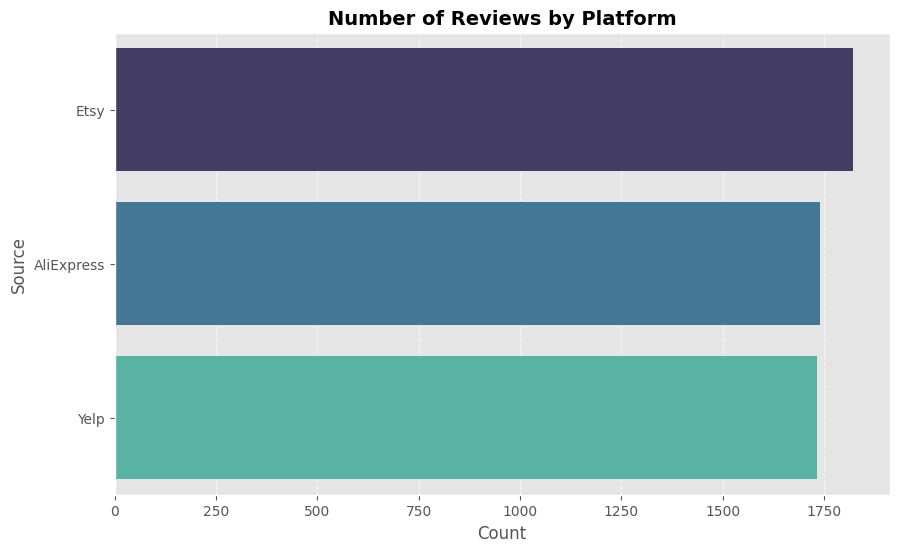

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(y=data["Source"].value_counts().index, x=data["Source"].value_counts(), palette="mako")
plt.title("Number of Reviews by Platform", fontsize=14, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Source", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



<ipython-input-12-b67b4122b471>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


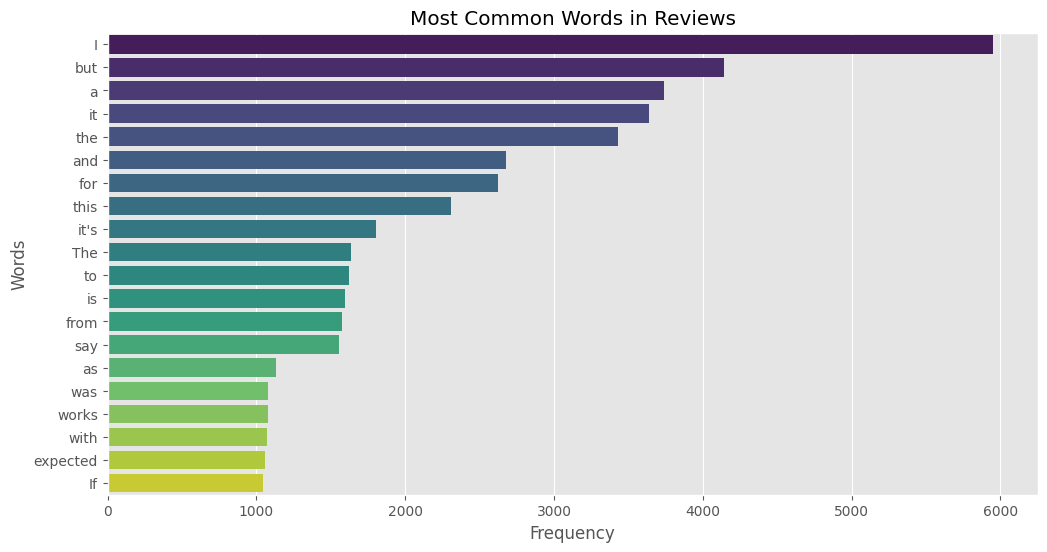

In [12]:
# Word Frequency Bar Chart
from collections import Counter

# Tokenizing words from review texts
all_words = " ".join(data["Review Paragraph"].dropna()).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Get top 20 words
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Most Common Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

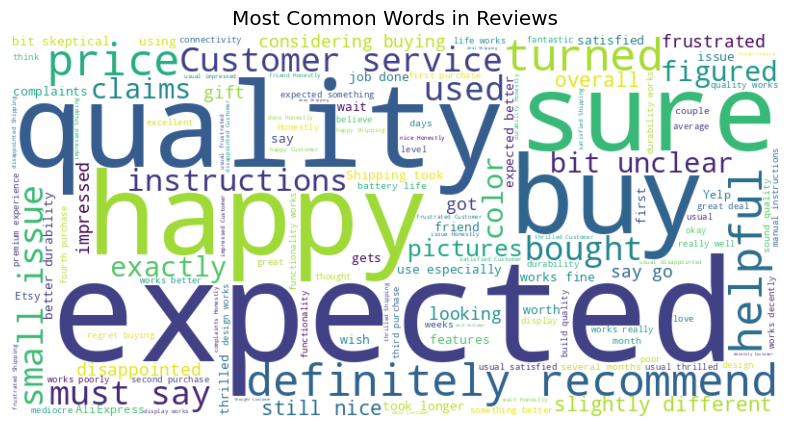

In [13]:
# Word Cloud for Review Texts
from wordcloud import WordCloud
text = " ".join(review for review in data["Review Paragraph"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


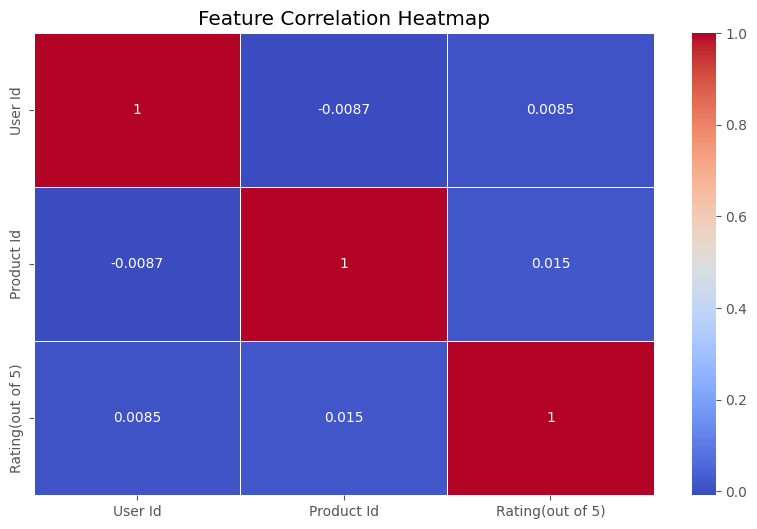

In [14]:
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

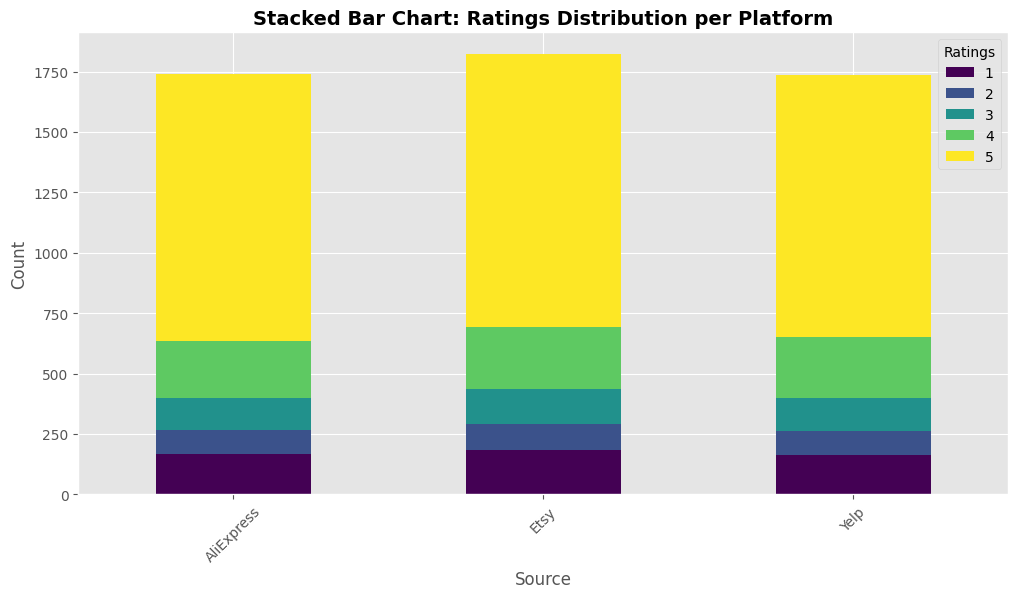

In [15]:
rating_distribution = data.groupby(["Source", "Rating(out of 5)"]).size().unstack()

rating_distribution.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Stacked Bar Chart: Ratings Distribution per Platform", fontsize=14, fontweight="bold")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Ratings", bbox_to_anchor=(1, 1))
plt.show()

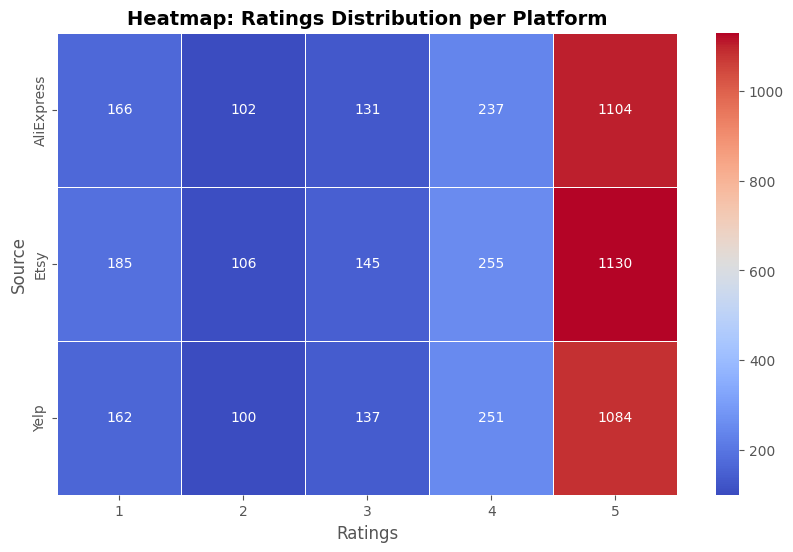

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(rating_distribution, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap: Ratings Distribution per Platform", fontsize=14, fontweight="bold")
plt.xlabel("Ratings")
plt.ylabel("Source")
plt.show()

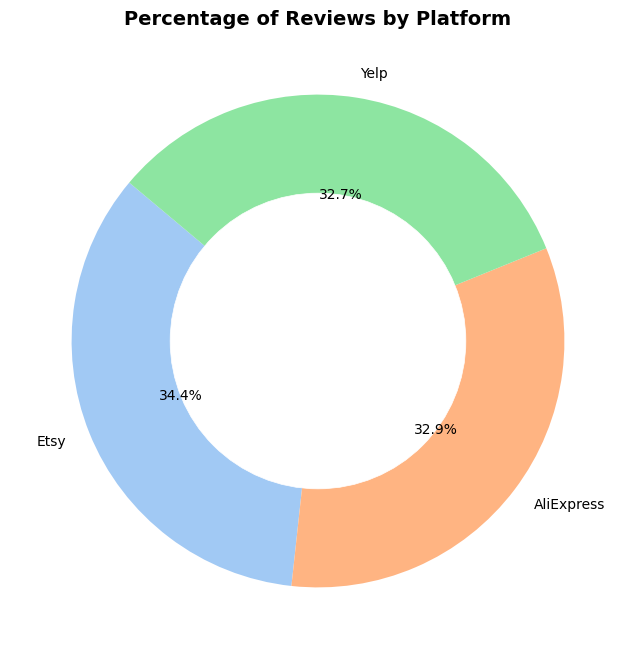

In [17]:
platform_counts = data["Source"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.gca().add_artist(plt.Circle((0,0), 0.6, color='white'))  # Creating the donut effect
plt.title("Percentage of Reviews by Platform", fontsize=14, fontweight="bold")
plt.show()


# **Basic Text Processing Using NLTK**

In [18]:
example = data['Review Paragraph'].iloc[49]
print(example)

Honestly, for the price, I expected something better, but it turned out to be frustrated. The instructions were a bit unclear, but I figured it out..


In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
# splitting text into words and conjunctions or simply tokens
nltk.word_tokenize(example)

['Honestly',
 ',',
 'for',
 'the',
 'price',
 ',',
 'I',
 'expected',
 'something',
 'better',
 ',',
 'but',
 'it',
 'turned',
 'out',
 'to',
 'be',
 'frustrated',
 '.',
 'The',
 'instructions',
 'were',
 'a',
 'bit',
 'unclear',
 ',',
 'but',
 'I',
 'figured',
 'it',
 'out',
 '..']

In [21]:
tokens = nltk.word_tokenize(example)
tokens[:8]

['Honestly', ',', 'for', 'the', 'price', ',', 'I', 'expected']

In [22]:
# part of speech tagging
nltk.download('averaged_perceptron_tagger', force=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

In [107]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

## **Sentiment Analysis(Model Building)**

In [28]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from nltk.tokenize import TreebankWordTokenizer
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [29]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [30]:
def get_sentiment_score_oplex(text):

    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """
    total_score = 0

    raw_sentences = sent_tokenize(text)

    for sentence in raw_sentences:

        sent_score = 0
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))


    return total_score

In [32]:
data.head()

,User Id,Product Id,Rating(out of 5),Review Paragraph,Scrape Timestamp,Source,Date
0,206819,69174,1,"I've used it for over a month, and I love it. ...",2025-01-20 14:13:00,Yelp,2025-01-20
1,464924,86973,5,"I got this as a gift, and it's satisfied. It d...",2025-01-20 13:49:00,AliExpress,2025-01-20
2,974753,82929,3,"used it for over a month, and I regret buying ...",2025-01-20 13:43:00,AliExpress,2025-01-20
3,461644,35853,5,"This is my second purchase from Yelp, and as u...",2025-01-20 13:32:00,AliExpress,2025-01-20
4,742399,36090,5,"Bought this from AliExpress, and I must say I'...",2025-01-20 14:26:00,AliExpress,2025-01-20


In [34]:
data.dropna(subset=['Review Paragraph'], inplace=True)
data.shape

(5295, 7)

In [35]:
data['oplex_sentiment_score'] = data['Review Paragraph'].apply(lambda x: get_sentiment_score_oplex(x))

In [36]:
data[['Review Paragraph','oplex_sentiment_score']].sample(2)

,Review Paragraph,oplex_sentiment_score
757,"The quality is average, and the sound quality ...",0.086957
893,"This is my first purchase from Yelp, and as us...",0.000000


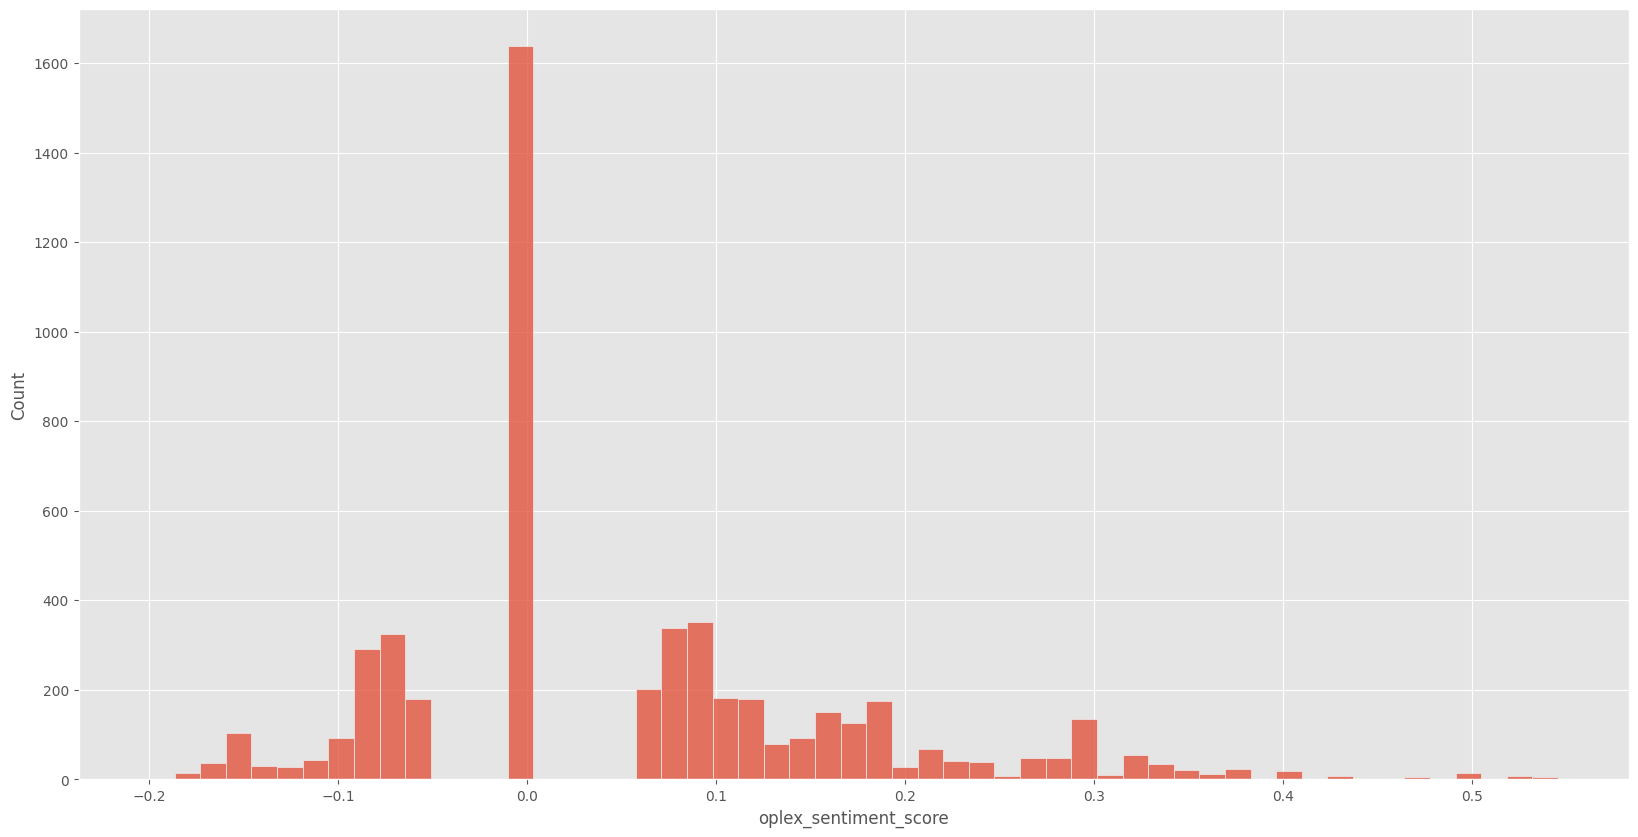

In [37]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=data.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

<Axes: xlabel='Review Paragraph', ylabel='count'>

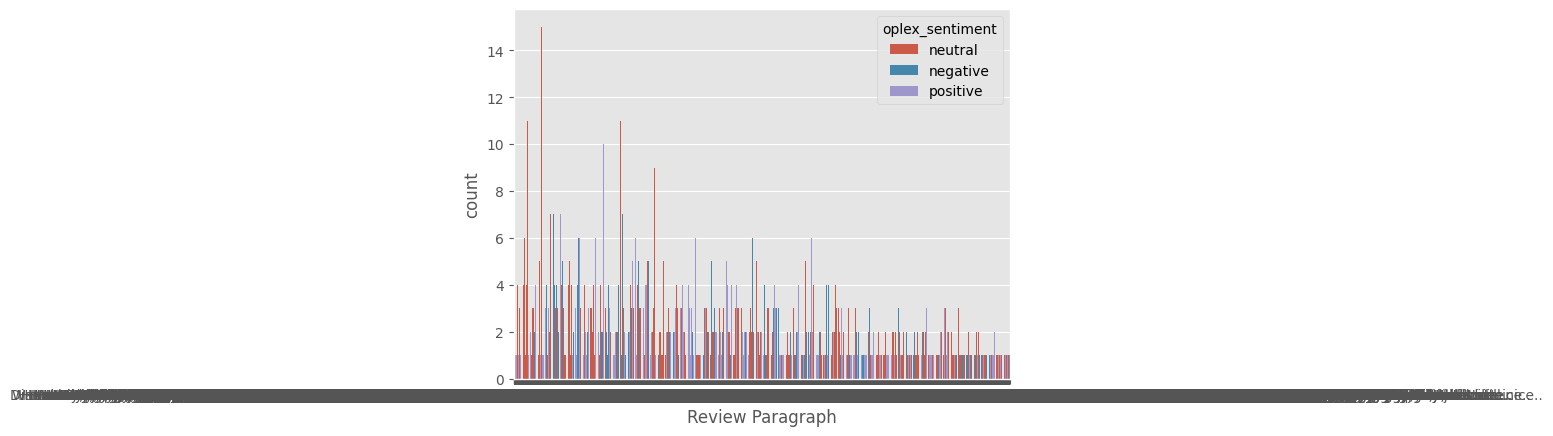

In [39]:
data['oplex_sentiment'] = \
    data['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))
sns.countplot(x='Review Paragraph', hue='oplex_sentiment' ,data = data)

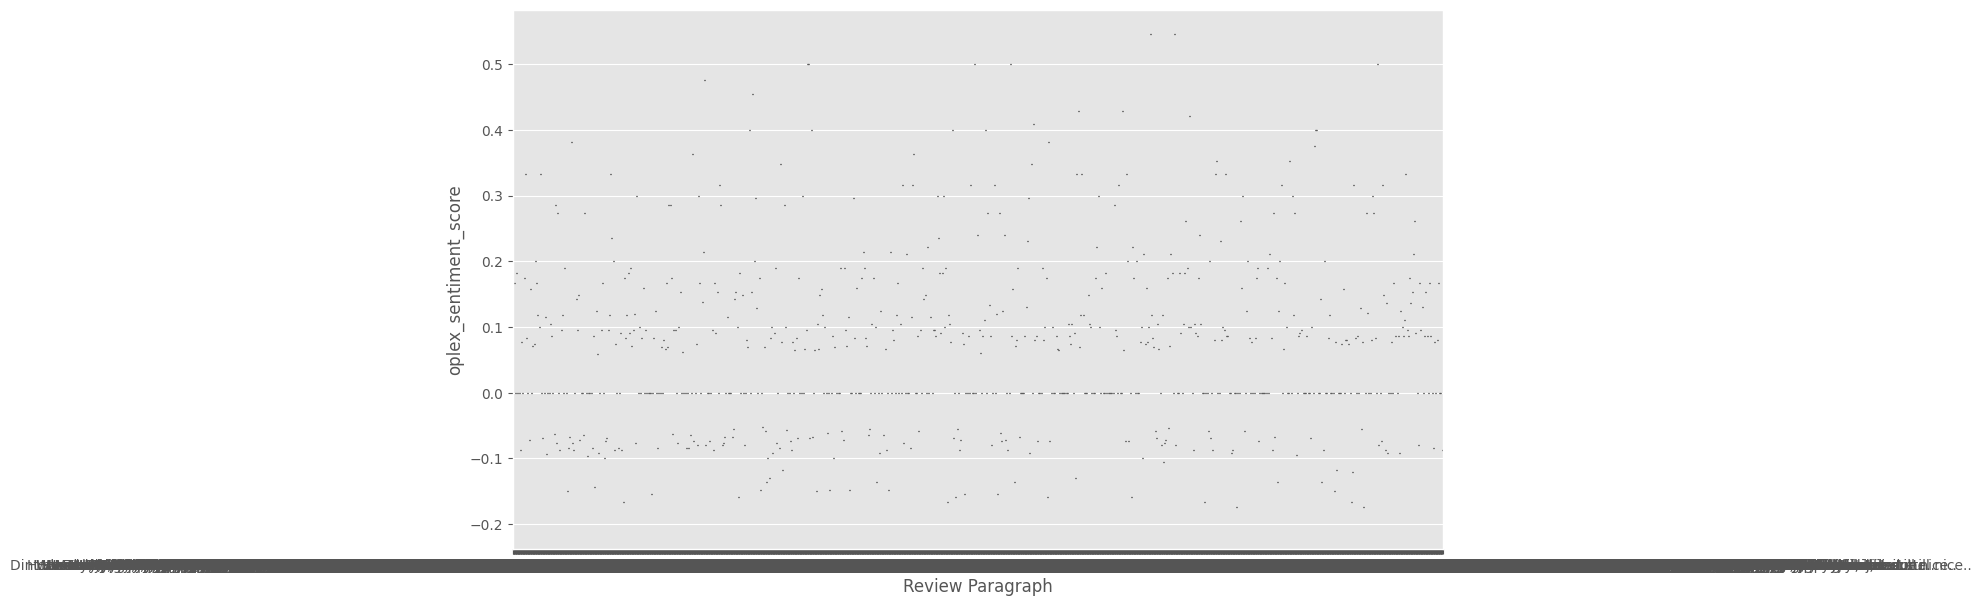

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='Review Paragraph', y='oplex_sentiment_score', data = data, ax=ax)
plt.show()

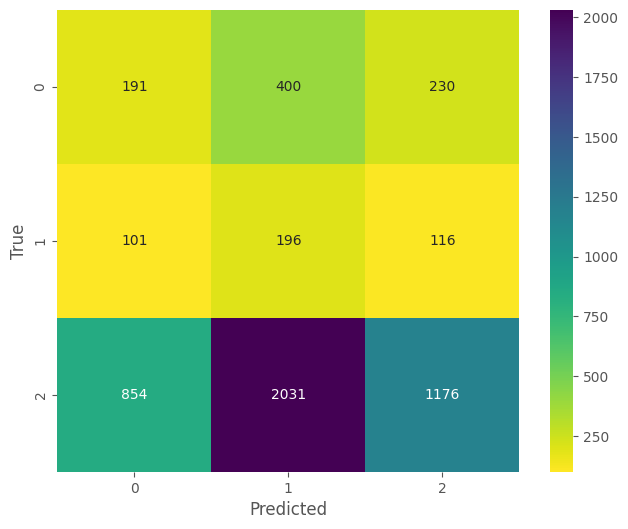

In [46]:
data['true_sentiment'] = \
    data['Rating(out of 5)'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))
y_true = data['true_sentiment'].tolist()
y_oplex_pred = data['oplex_sentiment'].tolist()
from sklearn.metrics import confusion_matrix
oplex_cm = confusion_matrix(y_true, y_oplex_pred)
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [47]:
oplex_cm = list(oplex_cm.ravel())
oplex_cm

[191, 400, 230, 101, 196, 116, 854, 2031, 1176]

In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Download the VADER lexicon
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [57]:
sia.polarity_scores("I am so happy after eating cremica's dark chocolate brownie!")

{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.6468}

In [58]:
sia.polarity_scores('This is the worst thing I have ever eaten.')

{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [59]:
example = data['Review Paragraph'].iloc[20]
sia.polarity_scores(example)

{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.3609}

In [63]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Review Paragraph']

    # Use the index 'i' as a unique identifier for each review
    res[i] = sia.polarity_scores(text)

  0%|          | 0/5295 [00:00<?, ?it/s]

In [64]:
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,5393,5394,5395,5396,5397,5398,5399,5400,5401,5402
neg,0.0000,0.1110,0.2540,0.0000,0.0000,0.0000,0.0940,0.2510,0.0000,0.0000,...,0.0000,0.0000,0.1350,0.2660,0.0870,0.1730,0.0850,0.0970,0.0000,0.077
neu,0.8000,0.6030,0.7460,0.8620,0.8040,0.7390,0.7080,0.7490,0.7380,0.8820,...,0.7900,0.5770,0.5230,0.7340,0.8320,0.8270,0.6480,0.6940,0.8490,0.923
pos,0.2000,0.2860,0.0000,0.1380,0.1960,0.2610,0.1970,0.0000,0.2620,0.1180,...,0.2100,0.4230,0.3420,0.0000,0.0810,0.0000,0.2660,0.2080,0.1510,0.000
compound,0.6696,0.5423,-0.5806,0.4926,0.5267,0.8126,0.4678,-0.6555,0.5023,0.3716,...,0.5023,0.8316,0.5799,-0.6202,-0.0384,-0.3716,0.6486,0.5003,0.4926,-0.128


In [66]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
# Assuming your original DataFrame 'data' has an index that can be used for merging:
data = data.reset_index().rename(columns={'index': 'Id'}) # Reset index of 'data' and rename it to 'Id'
vaders = vaders.merge(data, on='Id', how='left') #Merge on the 'Id' column

In [67]:
vaders.head()

,Id,neg,neu,pos,compound,User Id,Product Id,Rating(out of 5),Review Paragraph,Scrape Timestamp,Source,Date,oplex_sentiment_score,oplex_sentiment,true_sentiment
0,0,0.000,0.800,0.200,0.6696,206819,69174,1,"I've used it for over a month, and I love it. ...",2025-01-20 14:13:00,Yelp,2025-01-20,0.071429,neutral,negative
1,1,0.111,0.603,0.286,0.5423,464924,86973,5,"I got this as a gift, and it's satisfied. It d...",2025-01-20 13:49:00,AliExpress,2025-01-20,0.000000,neutral,positive
2,2,0.254,0.746,0.000,-0.5806,974753,82929,3,"used it for over a month, and I regret buying ...",2025-01-20 13:43:00,AliExpress,2025-01-20,-0.100000,negative,neutral
3,3,0.000,0.862,0.138,0.4926,461644,35853,5,"This is my second purchase from Yelp, and as u...",2025-01-20 13:32:00,AliExpress,2025-01-20,0.000000,neutral,positive
4,4,0.000,0.804,0.196,0.5267,742399,36090,5,"Bought this from AliExpress, and I must say I'...",2025-01-20 14:26:00,AliExpress,2025-01-20,0.166667,positive,positive


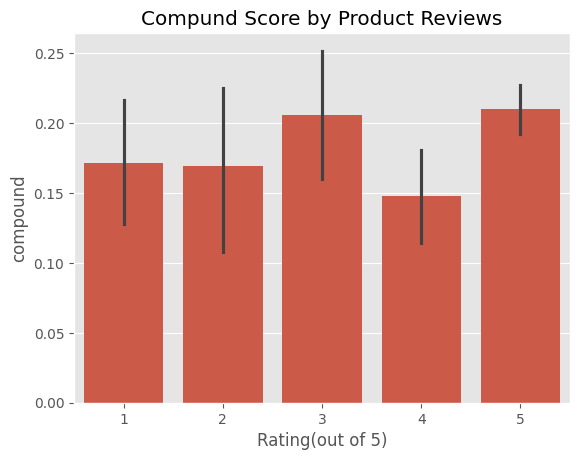

In [70]:
ax = sns.barplot(data=vaders, x='Rating(out of 5)', y='compound')
ax.set_title('Compund Score by Product Reviews')
plt.show()

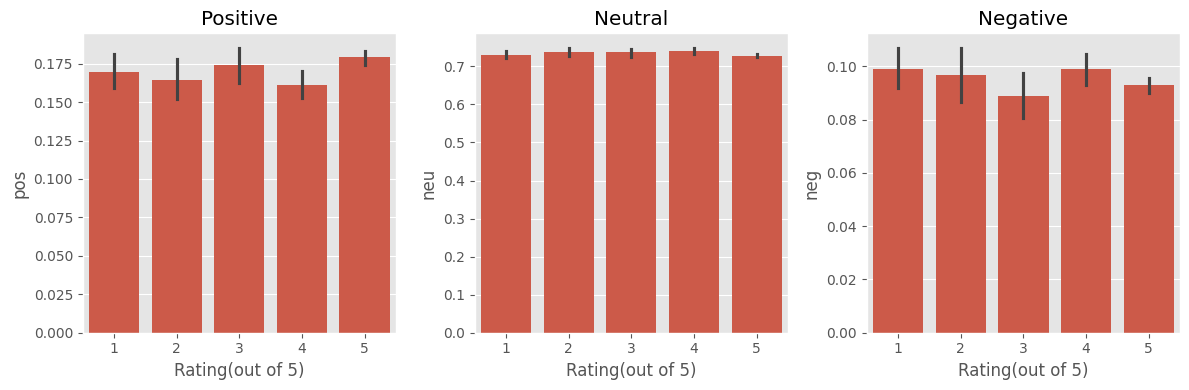

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(data=vaders, x='Rating(out of 5)', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating(out of 5)', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating(out of 5)', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [72]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [73]:
encoded_text = tokenizer(example, return_tensors='pt')     # pt is being used for pytorch
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.79541117, 'roberta_neu': 0.18413618, 'roberta_pos': 0.020452637}


In [74]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [77]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)): # Changed 'reviews' to 'data'
    text = row['Review Paragraph'] # Changed 'Text' to 'Review Paragraph'
    # myid = row['Id']  # This line might be unnecessary, as 'i' already serves as the unique identifier
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    break

  0%|          | 0/5295 [00:00<?, ?it/s]

In [78]:
vader_result


{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.6696}

In [79]:
roberta_result

{'roberta_neg': 0.0012513149,
 'roberta_neu': 0.008784483,
 'roberta_pos': 0.9899642}

In [82]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)): # Changed 'reviews' to 'data'
    try:
        text = row['Review Paragraph'] # Changed 'Text' to 'Review Paragraph' since your column is named 'Review Paragraph'
        myid = row['Id'] # Assuming 'Id' column exists to identify each review uniquely
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5295 [00:00<?, ?it/s]

In [83]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(data, how='left')
results_df.head(2)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,User Id,Product Id,Rating(out of 5),Review Paragraph,Scrape Timestamp,Source,Date,oplex_sentiment_score,oplex_sentiment,true_sentiment
0,0,0.000,0.800,0.200,0.6696,0.001251,0.008784,0.989964,206819,69174,1,"I've used it for over a month, and I love it. ...",2025-01-20 14:13:00,Yelp,2025-01-20,0.071429,neutral,negative
1,1,0.111,0.603,0.286,0.5423,0.009409,0.114606,0.875985,464924,86973,5,"I got this as a gift, and it's satisfied. It d...",2025-01-20 13:49:00,AliExpress,2025-01-20,0.000000,neutral,positive


In [84]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'User Id', 'Product Id',
       'Rating(out of 5)', 'Review Paragraph', 'Scrape Timestamp', 'Source',
       'Date', 'oplex_sentiment_score', 'oplex_sentiment', 'true_sentiment'],
      dtype='object')

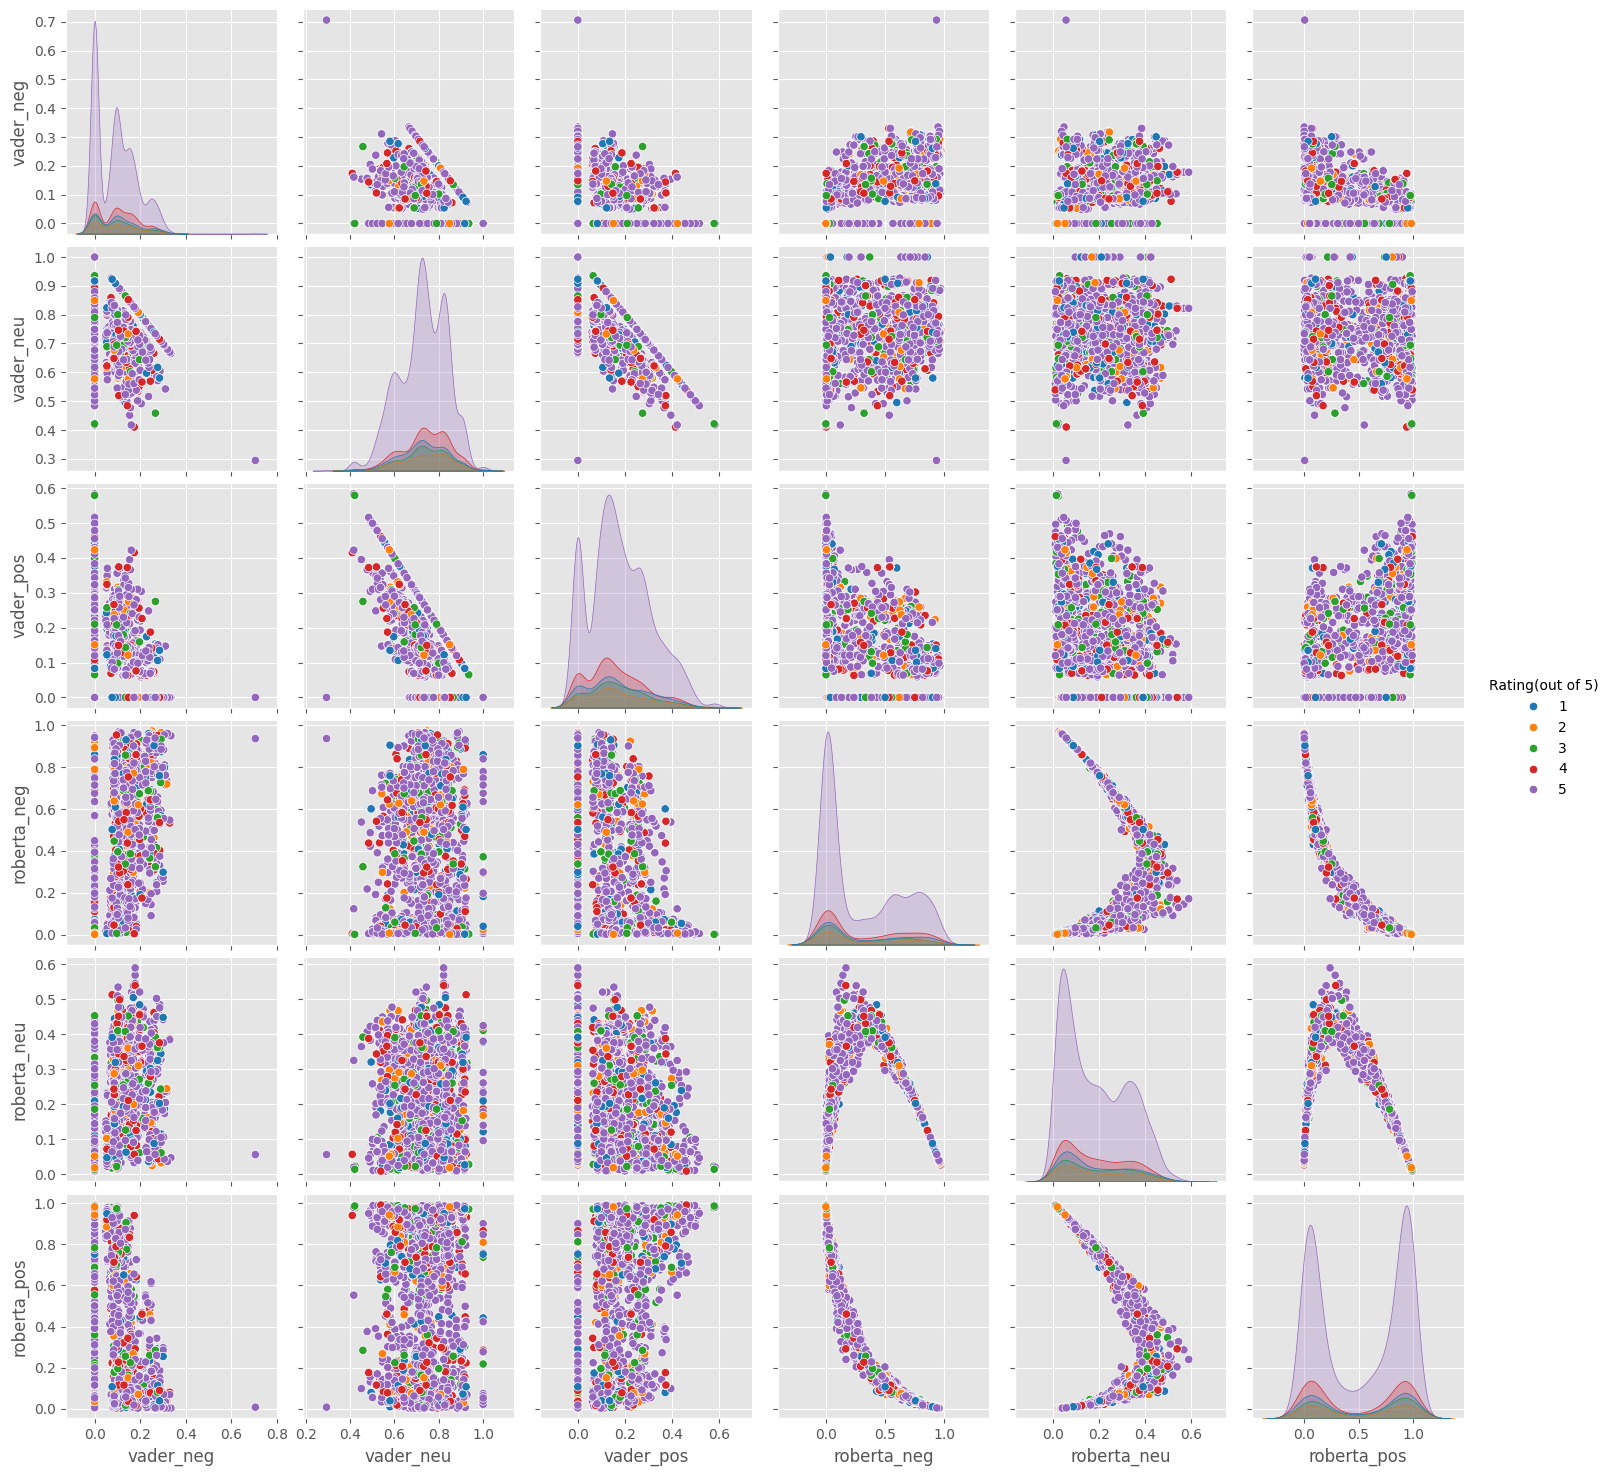

In [85]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating(out of 5)',
            palette='tab10')
plt.show()

In [91]:
results_df.query('`Rating(out of 5)` == 1') \
    .sort_values('roberta_pos', ascending=False)['Review Paragraph'].values[0]

"I've used it for several months, and I love it. Would definitely recommend to a friend.."

In [94]:
results_df.query("`Rating(out of 5)` == 1") \
    .sort_values('vader_pos', ascending=False)['Review Paragraph'].values[0]

"I got this as a gift, and it's satisfied. Would definitely recommend to a friend.."

In [96]:

results_df.query('`Rating(out of 5)` == 5') \
    .sort_values('roberta_neg', ascending=False)['Review Paragraph'].values[0]

'The quality is mediocre, and the battery life works poorly. Not sure if I would buy this again..'

In [98]:
results_df.query('`Rating(out of 5)` == 5') \
    .sort_values('vader_pos', ascending=False)['Review Paragraph'].values[0]

"I got this as a gift, and it's impressed. Would definitely recommend to a friend.."

Confusion Matrix:
 [[1176 2031  854]
 [ 116  196  101]
 [ 230  400  191]]


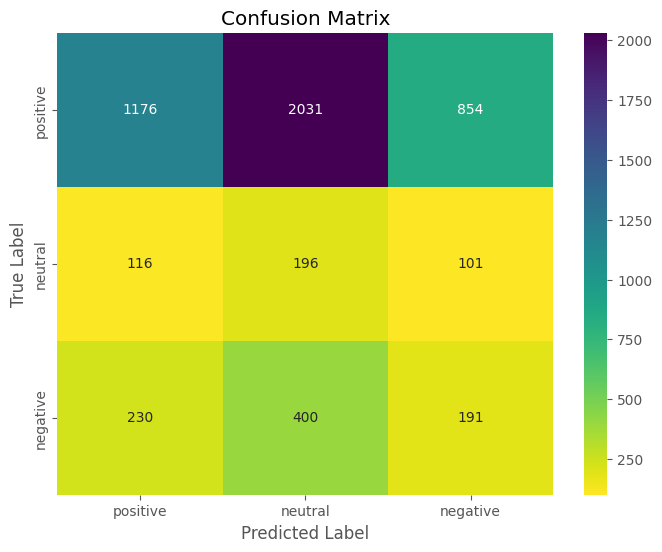

Accuracy: 0.2952
Precision: 0.6243
Recall: 0.2952
F1 Score: 0.3633

Classification Report:
               precision    recall  f1-score   support

    positive       0.17      0.23      0.19       821
     neutral       0.07      0.47      0.13       413
    negative       0.77      0.29      0.42      4061

    accuracy                           0.30      5295
   macro avg       0.34      0.33      0.25      5295
weighted avg       0.62      0.30      0.36      5295



In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Define the sentiment labels
labels = ["positive", "neutral", "negative"]

# Ensure y_true and y_oplex_pred have the same length and correspond to the same data points
# Assuming 'data' is your DataFrame containing both true and predicted labels:
y_true = data['true_sentiment'].tolist()
y_oplex_pred = data['oplex_sentiment'].tolist()

# Make sure y_true and y_oplex_pred have the same length
assert len(y_true) == len(y_oplex_pred), "y_true and y_oplex_pred have different lengths!"

# Compute confusion matrix
oplex_cm = confusion_matrix(y_true, y_oplex_pred, labels=labels)

# Print Confusion Matrix
print("Confusion Matrix:\n", oplex_cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(oplex_cm, annot=True, fmt='d', cmap='viridis_r', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute Accuracy
accuracy = accuracy_score(y_true, y_oplex_pred)

# Compute Precision, Recall, F1-Score
precision = precision_score(y_true, y_oplex_pred, average='weighted')
recall = recall_score(y_true, y_oplex_pred, average='weighted')
f1 = f1_score(y_true, y_oplex_pred, average='weighted')

# Print Scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_oplex_pred, target_names=labels))

## ***Sentiment Scoring using Transformers Pipeline Method***

In [99]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [100]:
sent_pipeline('I love burgers')

[{'label': 'POSITIVE', 'score': 0.9995124340057373}]

In [101]:
sent_pipeline('I am literally crazy about pizzas and this was the one I oblige for')

[{'label': 'POSITIVE', 'score': 0.9969257712364197}]

In [102]:
sent_pipeline("I hate eating these fries")

[{'label': 'NEGATIVE', 'score': 0.997542142868042}]

In [103]:
sent_pipeline("I am okay with the food")

[{'label': 'POSITIVE', 'score': 0.9998185038566589}]

In [104]:
sent_pipeline("Not satisfied with the product")

[{'label': 'NEGATIVE', 'score': 0.9997840523719788}]

# Accuracy of the Transformer Pipeline Method comes out to be the highest (more that 99% as seen above)